Data_Engineering_TIL_(20190423)

study program : https://www.fastcampus.co.kr/extension_des


### [학습목표]

- AWS Sagemaker 기초개념 이해


### [학습기록]

- 데이터분석 아키텍처

아래 그림에서 핀포인트라는 서비스라는게 있다. 마케팅 툴이라고 할 수 있는데 사용자의 이벤트를 토대로 push나 메일 등 마케팅 기법을 적용할 수 있는 서비스이다. 핀포인트를 통해서 이벤트 수집용으로도 쓸 수 있다.


키네시스 어넬러틱스 툴은 아직 서울이나 도쿄 리전에서는 제공되지는 않는 서비스이다. 북미리전에서 할 수 있다.


또한 DMS는 정말 유용한 툴이라고 할 수 있다. 예를들어 스파크로 RDS에 있는 데이터를 한꺼번에 800만건을 옮기는 시도는 RDS cpu에 부하가 걸리는 문제가 발생할 수 있지만 DMS으로 하게되면 그런문제없이 깔끔하게 옮길 수 있다.


그래서 아래 그림처럼 외부에서 들어오는 로우한 데이터를 정재하여 serving data store에 저장하여 각종 시각화툴로 서비스 사용자에게 제공을 할수도 있고, 분석가나 개발자가 이를 활용할 수도 있다.


이런 아키텍러를 구성하면 그 다음 스텝으로는 데이터를 모으는 것을 자동화 할 수도 있다. 예를들어서 매일매일 특정시간에 특정데이터를 저장하도록 자동화하면 이렇게 자동화하여 쌓인 데이터를 기반으로 우리가 할 수 있는 것들이 많아지게 된다.


또한 serving data store에 데이터를 쌓으면 이 데이터를 Analytical sandbox로 가져와서 ML modeling 등 분석을 할 수 있다.

<img src="0.png" width="1000" />

- MySQL의 구조와 시스템 운영 시 주의사항

아래의 그림은 MySQL 시스템 구성을 하나의 예시로 그려넣은 것이다.

MySQL은 아래 그림과 같이 레플리카 구조이다. 데이터를 insert 할때는 master 노드를 이용한다. 왜냐하면 master 노드만 write할 수 있다. 이 마스터노드와 레플리카는 항상 sink를 맞춰줘야 한다. 통상 sql은 조회를 하는 경우가 더 많은데 이 때는 레플리카라고 해서 read만 할 수 있는 디비다. 레플리카는 보통 mass한 데이터를 땡겨서 조회하는 용도이다. 


조심해야할게 아래 그림처럼 마스터노드가 CPU 사용량이 80% 이상이고 이게 sql이 서비스가 운영된다고 가정하면 계속해서 데이터가 write 될 것이다. 그러면 데이터가 계속들어가게 되고 동시에 레플리카들도 sink를 맞춰줘야 한다. 그래서 레플리카들도 계속 copy를 하게 된다. 그 중에서 예를들어서 레플리카 4번의 cpu 사용량이 90프로 이상이 넘어가게되면 마스터노드에서 레플리카로 데이터를 카피해서 주려고 하는데 힘들어서 받지를 못하는 현상이 발생한다. 그러면 마스터노드 한쪽에 데이터가 비정상적으로 쌓이게 된다. 그러면 마스터노드도 cpu에 부하가 차기 시작하고 그러면 마스터도 레플리카에 데이터를 카피에서 못주는 현상이 발생할수도 있고 이런식으로 시스템 전체에 문제가 발생할 수 있다.

<img src="0-0.png" width="700" />

- 오로라 vs MySQL

MySQL은 카피 방식이고, 오로라는 쉐어방식이다. 다시말해 오로라는 서버들이 디스크를 그냥 쉐어하는 방식이다. 구조는 위의 그림과 같으나 디스크는 하나라서 서버들이 이 디스크 하나를 쉐어하는 방식이다. MySQL을 개선한 것이 오로라라고 할 수 있다.


- 머신러닝을 함에 있어서 어떤 모델을 쓰느냐 만큼 중요한게 데이터양이다. 결국에 모델을 구성하는 것이 데이터이기 때문에 어떤 데이터를 어떻게 넣느냐에 따라 결과는 달라지게 된다.


- 현업에서 머신러닝 모델의 비지니스 적용 패턴

협업에서 가장 중요한 것은 어떤 비지니스 문제에 대해서 머신러닝을 적용해서 효과를 볼것인가이다.

<img src="0-1.png" width="600" />

- 비지니스 적용을 위한 머신러닝 모델 구성과정 플로우차트

<img src="0-2.png" width="1000" />

- Amazon SageMaker 개요

데이터사이언티스트와 개발자들이 머신러닝 모델을 빠르고 쉽게 만들수 있도록 해주는 완전 관리형 서비스

데이터 분석모델을 sagemaker에 등록된 기존의 알고리즘을 가져와서 적용하고, 배포할 수도 있고, 자체적으로 만들어서 등록하고, 배포할 수도 있다.

sagemaker는 주피터노트북 인스턴스, 머신러닝 트레이닝/호스팅 인스턴스를 제공한다. 타입은 CPU, GPU 버전 다양하게 있다.

쉽게말해서 머신러닝 인스턴스는 EC2 인스턴스 이미지인데 모델을 갖고 있는 것을 말한다.

<img src="0-3.png" width="1000" />

### [실습 프리뷰]

1) Sagemaker 서비스에서 DeepAR 모델을 이용한 전력소비량 시계열 데이터 분석 

DeepAR 모델은 ARIMA 모델과 유사하다고 생각하면 된다.

미래의 전력을 얼마나 쓸건지에 대한 예측을 할 것이다.

모델을 등록을하고 데이터가 들어가면 Sagemaker 서비스가 그 모델(인스턴스)이 구동해서 분석해준다. 

1번 실습 아키텍처

<img src="0-3-2.png" width="1000" />

2) 사용자가 특정 영어문장을 입력하면 독일어로 번역해주는 머신러닝 서비스 배포

딕셔너리 형태의 데이터를 이용하여 영어를 독일어로 번역하는 것을 모델로 학습한 다음에 학습된 모델을 sagemaker에 등록하고(실제로는 등록하는 과정은 생략하고 사전에 미리 만들어놓은 endpoint를 이용할 것이다. 왜냐하면 트레이닝 하는 시간이 너무 오래걸려서..), endpoint에 등록해서 사용자가 영어문장을 제이슨형태로 날려주면 독일어로 return 해주는 서비스를 구현해본다.

2번 실습 아키텍처

<img src="0-4.png" width="1000" />

### [실습 상세내용]

#### 1) Sagemaker 서비스에서 DeepAR 모델을 이용한 전력소비량 시계열 데이터 분석 

STEP1) 먼저 아래 그림과 같이 sagemaker 서비스 콘솔에 접속하여 주피터노트북 인스턴스를 만들어준다.


참고로 주피터노트북 인스턴스 생성 시 IAM롤은 AWS 내 서비스 간에 접근하고자 할때 룰을 정의를 해줘야하는 것이고, 미리 정의를 해둔 IAM을 선택한다. 이번실습에는 ec2와 s3를 쓸것이기 때문에 거기에 대한 접근권한을 정의해둔 것이다.

(아래 그림참고)


그리고 create하여 콘솔에서 주피터노트북 인스턴스가 생성되었는지 확인한다.

<img src="1.png" width="1000" />

STEP2) 

콘솔에서 msparkdees 인스턴스에서 우측에 'Open Jupyter'를 클릭한다.

그 다음에 아래 그림과 같은 주피터 노트북에서 new 클릭 -> 터미널 클릭

(우리가 띄운게 인스턴스 형태기 때문에 CLI 콘솔로 접근해서 원하는 파일을 다운로드 받을 수 있다)

그 다음에 아래 터미널 그림과 같이 최초에 sagemaker 폴더로 이동한 다음에 git clone 명령어를 실행해서 실습할 주피터노드북 파일, 데이터 등을 받아준다. 

(git clone https://github.com/awslabs/amazon-sagemaker-examples)

주피터 노트북에 실습할 파일들이 잘 다운로드 받아졌는지 확인한다.

<img src="2.png" width="1000" />

STEP3)

아래 그림과 같은 경로로 이동하여 DeepAR ... .ipynb를 클릭하여 열어준다.

또한 아래 그림과 같이 노트북을 블럭을 하나씩 실행하면 되고 다음과 같은 블럭은 우리가 사전에 정해놓은 s3 버켓를 기입하고, 또한 버킷네 어떤디렉토리로 파일을 넣어줄 것인지 정해서 기입해준다.

<img src="3.png" width="1000" />

STEP4) 그리고 중간에 아래 그림과 같은 코드가 샘플데이터를 다운로드 받는 부분이다. 실행해준다.

여기까지 실행하면 얘가 샘플데이터를 다운로드 받는다. 그리고 계속 순차적으로 아래로 블록을 실행해준다.

<img src="4.png" width="1000" />

STEP5) 이부분은 DeepAR 모델을 돌리려면 데이터 형태가 제이슨 형태여야하기 때문에 데이터를 제이슨 형태로 변형해주는 부분이다.

<img src="5.png" width="1000" />

STEP6) 그리고 또 계속 실행하다 보면 아래 그림과 같은 코드가 나오는데 이 부분은 S3로 파일을 올려주는 부분이다.

이 코드를 실행하고 S3 버켓의 아까 지정된 경로로 가보면 파일이 생성된 것이 보인다.

여기까지 하면 모델을 트레이닝하기 전단계까지 실시한것이다.

<img src="6.png" width="1000" />

STEP7) 그리고 다음과 같은 코드를 실행해주면 모델이 training을 하게되고 그 진행상황은 sagemaker 콘솔에서 training jobs에서 확인할 수 있다.

트레이닝은 모델트레이닝 인스턴스를 띄워서 잡을 생성하게되고 트레이닝을 하게된다.

트레이닝 시간은 약 7분정도 걸린다.

<img src="7.png" width="1000" />

STEP8) 모델을 트레이닝하고 실행을 해보려면 endpoint를 생성해줘야 한다. 

아래와 같은 코드들을 실행하면 model을 등록하고, endpoint가 생성된다.

엔드포인트도 일종에 서버다. 그러니까 머신러닝 모델 서버라고 보면 된다. 그러면 서버에 input 데이터를 넣어주면 output 결과를 받아볼 수 있다는 말이다.

<img src="8.png" width="1000" />

STEP9) 그리고 주피터노트북에서 순차적으로 계속 additional feature 파트 전까지 실행하면 그러면 아래 그림과 같이 결과를 확인할 수 있다.

아래의 그림은 91번 customer의 예측 결과를 보여준다.

<img src="25.png" width="1000" />

- 실습한 DeepAR-electricity.ipynb 파일 내용

# SageMaker/DeepAR demo on electricity dataset

This notebook complements the [DeepAR introduction notebook](https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_amazon_algorithms/deepar_synthetic/deepar_synthetic.ipynb). 

Here, we will consider a real use case and show how to use DeepAR on SageMaker for predicting energy consumption of 370 customers over time, based on a [dataset](https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014) that was used in the academic papers [[1](https://media.nips.cc/nipsbooks/nipspapers/paper_files/nips29/reviews/526.html)] and [[2](https://arxiv.org/abs/1704.04110)].  

In particular, we will see how to:
* Prepare the dataset
* Use the SageMaker Python SDK to train a DeepAR model and deploy it
* Make requests to the deployed model to obtain forecasts interactively
* Illustrate advanced features of DeepAR: missing values, additional time features, non-regular frequencies and category information

Running this notebook takes around 40 min on a ml.c4.2xlarge for the training, and inference is done on a ml.m4.xlarge (the usage time will depend on how long you leave your served model running).

For more information see the DeepAR [documentation](https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html) or [paper](https://arxiv.org/abs/1704.04110), 

In [1]:
%matplotlib inline

import sys
from urllib.request import urlretrieve
import zipfile
from dateutil.parser import parse
import json
from random import shuffle
import random
import datetime
import os

import boto3
import s3fs
import sagemaker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import IntSlider, FloatSlider, Checkbox

In [2]:
# set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

In [3]:
sagemaker_session = sagemaker.Session()

Before starting, we can override the default values for the following:
- The S3 bucket and prefix that you want to use for training and model data. This should be within the same region as the Notebook Instance, training, and hosting.
- The IAM role arn used to give training and hosting access to your data. See the documentation for how to create these.

In [4]:
s3_bucket = 'dees2-class'  # replace with an existing bucket if needed
s3_prefix = 'sagemaker/mspark_dees2/deepar'    # prefix used for all data stored within the bucket

role = sagemaker.get_execution_role()    # IAM role to use by SageMaker

In [5]:
region = sagemaker_session.boto_region_name

s3_data_path = "s3://{}/{}/data".format(s3_bucket, s3_prefix)
s3_output_path = "s3://{}/{}/output".format(s3_bucket, s3_prefix)

Next, we configure the container image to be used for the region that we are running in.

In [6]:
image_name = sagemaker.amazon.amazon_estimator.get_image_uri(region, "forecasting-deepar", "latest")

### Import electricity dataset and upload it to S3 to make it available for Sagemaker

As a first step, we need to download the original data set of from the UCI data set repository.

In [7]:
DATA_HOST = "https://archive.ics.uci.edu"
DATA_PATH = "/ml/machine-learning-databases/00321/"
ARCHIVE_NAME = "LD2011_2014.txt.zip"
FILE_NAME = ARCHIVE_NAME[:-4]

In [8]:
def progress_report_hook(count, block_size, total_size):
    mb = int(count * block_size // 1e6)
    if count % 500 == 0:
        sys.stdout.write("\r{} MB downloaded".format(mb))
        sys.stdout.flush()

if not os.path.isfile(FILE_NAME):
    print("downloading dataset (258MB), can take a few minutes depending on your connection")
    urlretrieve(DATA_HOST + DATA_PATH + ARCHIVE_NAME, ARCHIVE_NAME, reporthook=progress_report_hook)

    print("\nextracting data archive")
    zip_ref = zipfile.ZipFile(ARCHIVE_NAME, 'r')
    zip_ref.extractall("./")
    zip_ref.close()
else:
    print("File found skipping download")

downloading dataset (258MB), can take a few minutes depending on your connection
258 MB downloaded
extracting data archive


Then, we load and parse the dataset and convert it to a collection of Pandas time series, which makes common time series operations such as indexing by time periods or resampling much easier. The data is originally recorded in 15min interval, which we could use directly. Here we want to forecast longer periods (one week) and resample the data to a granularity of 2 hours.

In [9]:
data = pd.read_csv(FILE_NAME, sep=";", index_col=0, parse_dates=True, decimal=',')
num_timeseries = data.shape[1]
data_kw = data.resample('2H').sum() / 8
timeseries = []
for i in range(num_timeseries):
    timeseries.append(np.trim_zeros(data_kw.iloc[:,i], trim='f'))

Let us plot the resulting time series for the first ten customers for the time period spanning the first two weeks of 2014.

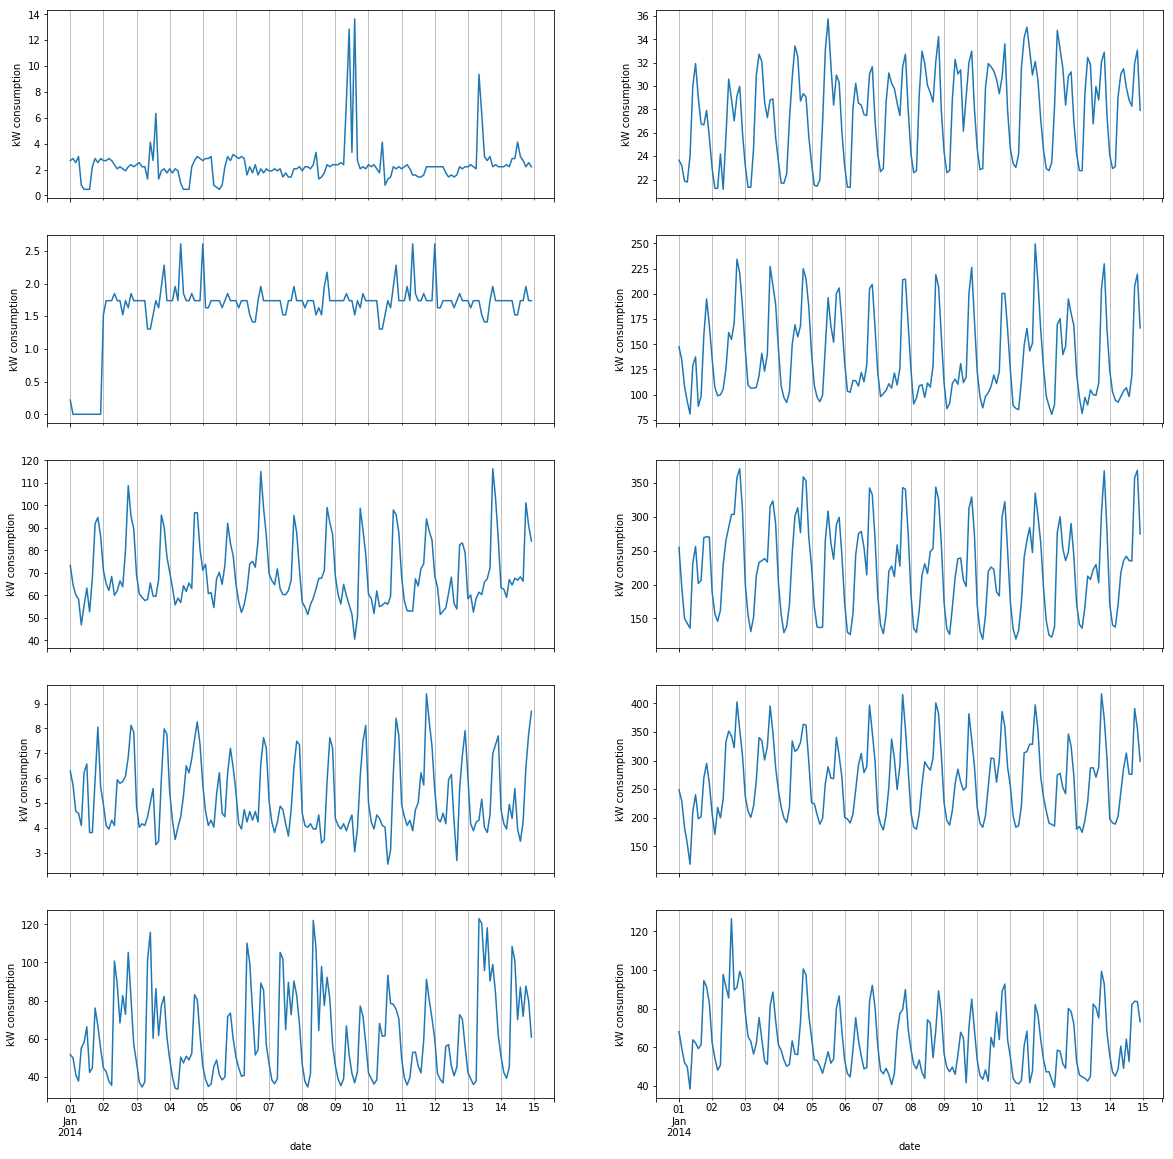

In [10]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 10):
    timeseries[i].loc["2014-01-01":"2014-01-14"].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("kW consumption")   
    axx[i].grid(which='minor', axis='x')

### Train and Test splits

Often times one is interested in evaluating the model or tuning its hyperparameters by looking at error metrics on a hold-out test set. Here we split the available data into train and test sets for evaluating the trained model. For standard machine learning tasks such as classification and regression, one typically obtains this split by randomly separating examples into train and test sets. However, in forecasting it is important to do this train/test split based on time rather than by time series.

In this example, we will reserve the last section of each of the time series for evalutation purpose and use only the first part as training data. 

In [11]:
# we use 2 hour frequency for the time series
freq = '2H'

# we predict for 7 days
prediction_length = 7 * 12

# we also use 7 days as context length, this is the number of state updates accomplished before making predictions
context_length = 7 * 12

We specify here the portion of the data that is used for training: the model sees data from 2014-01-01 to 2014-09-01 for training.

In [12]:
start_dataset = pd.Timestamp("2014-01-01 00:00:00", freq=freq)
end_training = pd.Timestamp("2014-09-01 00:00:00", freq=freq)

The DeepAR JSON input format represents each time series as a JSON object. In the simplest case each time series just consists of a start time stamp (``start``) and a list of values (``target``). For more complex cases, DeepAR also supports the fields ``dynamic_feat`` for time-series features and ``cat`` for categorical features, which we will use  later.

In [13]:
training_data = [
    {
        "start": str(start_dataset),
        "target": ts[start_dataset:end_training - 1].tolist()  # We use -1, because pandas indexing includes the upper bound 
    }
    for ts in timeseries
]
print(len(training_data))

370


As test data, we will consider time series extending beyond the training range: these will be used for computing test scores, by using the trained model to forecast their trailing 7 days, and comparing predictions with actual values.
To evaluate our model performance on more than one week, we generate test data that extends to 1, 2, 3, 4 weeks beyond the training range. This way we perform *rolling evaluation* of our model.

In [14]:
num_test_windows = 4

test_data = [
    {
        "start": str(start_dataset),
        "target": ts[start_dataset:end_training + k * prediction_length].tolist()
    }
    for k in range(1, num_test_windows + 1) 
    for ts in timeseries
]
print(len(test_data))

1480


Let's now write the dictionary to the `jsonlines` file format that DeepAR understands (it also supports gzipped jsonlines and parquet).

In [15]:
def write_dicts_to_file(path, data):
    with open(path, 'wb') as fp:
        for d in data:
            fp.write(json.dumps(d).encode("utf-8"))
            fp.write("\n".encode('utf-8'))

In [16]:
%%time
write_dicts_to_file("train.json", training_data)
write_dicts_to_file("test.json", test_data)

CPU times: user 3.91 s, sys: 90.5 ms, total: 4 s
Wall time: 4 s


Now that we have the data files locally, let us copy them to S3 where DeepAR can access them. Depending on your connection, this may take a couple of minutes.

In [17]:
s3 = boto3.resource('s3')
def copy_to_s3(local_file, s3_path, override=False):
    assert s3_path.startswith('s3://')
    split = s3_path.split('/')
    bucket = split[2]
    path = '/'.join(split[3:])
    buk = s3.Bucket(bucket)
    
    if len(list(buk.objects.filter(Prefix=path))) > 0:
        if not override:
            print('File s3://{}/{} already exists.\nSet override to upload anyway.\n'.format(s3_bucket, s3_path))
            return
        else:
            print('Overwriting existing file')
    with open(local_file, 'rb') as data:
        print('Uploading file to {}'.format(s3_path))
        buk.put_object(Key=path, Body=data)

In [18]:
%%time
copy_to_s3("train.json", s3_data_path + "/train/train.json")
copy_to_s3("test.json", s3_data_path + "/test/test.json")

Uploading file to s3://dees2-class/sagemaker/mspark_dees2/deepar/data/train/train.json
Uploading file to s3://dees2-class/sagemaker/mspark_dees2/deepar/data/test/test.json
CPU times: user 539 ms, sys: 81.9 ms, total: 621 ms
Wall time: 1.56 s


Let's have a look to what we just wrote to S3.

In [19]:
s3filesystem = s3fs.S3FileSystem()
with s3filesystem.open(s3_data_path + "/train/train.json", 'rb') as fp:
    print(fp.readline().decode("utf-8")[:100] + "...")

{"start": "2014-01-01 00:00:00", "target": [2.6967005076142154, 2.8553299492385804, 2.53807106598985...


We are all set with our dataset processing, we can now call DeepAR to train a model and generate predictions.

### Train a model

Here we define the estimator that will launch the training job.

In [20]:
estimator = sagemaker.estimator.Estimator(
    sagemaker_session=sagemaker_session,
    image_name=image_name,
    role=role,
    train_instance_count=1,
    train_instance_type='ml.c4.2xlarge',
    base_job_name='mspark-deepar-electricity-demo',
    output_path=s3_output_path
)

Next we need to set the hyperparameters for the training job. For example frequency of the time series used, number of data points the model will look at in the past, number of predicted data points. The other hyperparameters concern the model to train (number of layers, number of cells per layer, likelihood function) and the training options (number of epochs, batch size, learning rate...). We use default parameters for every optional parameter in this case (you can always use [Sagemaker Automated Model Tuning](https://aws.amazon.com/blogs/aws/sagemaker-automatic-model-tuning/) to tune them).

In [21]:
hyperparameters = {
    "time_freq": freq,
    "epochs": "400",
    "early_stopping_patience": "40",
    "mini_batch_size": "64",
    "learning_rate": "5E-4",
    "context_length": str(context_length),
    "prediction_length": str(prediction_length)
}

In [22]:
estimator.set_hyperparameters(**hyperparameters)

We are ready to launch the training job. SageMaker will start an EC2 instance, download the data from S3, start training the model and save the trained model.

If you provide the `test` data channel as we do in this example, DeepAR will also calculate accuracy metrics for the trained model on this test. This is done by predicting the last `prediction_length` points of each time-series in the test set and comparing this to the actual value of the time-series. 

**Note:** the next cell may take a few minutes to complete, depending on data size, model complexity, training options.

In [23]:
%%time
data_channels = {
    "train": "{}/train/".format(s3_data_path),
    "test": "{}/test/".format(s3_data_path)
}

estimator.fit(inputs=data_channels, wait=True)

INFO:sagemaker:Creating training-job with name: mspark-deepar-electricity-demo-2019-04-23-11-49-56-382


2019-04-23 11:50:00 Starting - Starting the training job...
2019-04-23 11:50:27 Starting - Launching requested ML instances.........
2019-04-23 11:51:31 Starting - Preparing the instances for training......
2019-04-23 11:52:47 Downloading - Downloading input data..
Arguments: train
[04/23/2019 11:53:07 INFO 140103474968384] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'num_dynamic_feat': u'auto', u'dropout_rate': u'0.10', u'mini_batch_size': u'128', u'test_quantiles': u'[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'num_eval_samples': u'100', u'learning_rate': u'0.001', u'num_cells': u'40', u'num_layers': u'2', u'embedding_dimension': u'10', u'_kvstore': u'auto', u'_num_kv_servers': u'auto', u'cardinality': u'auto', u'likelihood': u'student-t', u'early_stopping_patience': u''}
[04/23/2019 11:53:07 INFO 140103474968384] Reading provided configuration from /


2019-04-23 11:53:05 Training - Training image download completed. Training in progress.[04/23/2019 11:53:16 INFO 140103474968384] Epoch[3] Batch[5] avg_epoch_loss=5.269741
[04/23/2019 11:53:16 INFO 140103474968384] #quality_metric: host=algo-1, epoch=3, batch=5 train loss <loss>=5.26974105835
[04/23/2019 11:53:16 INFO 140103474968384] Epoch[3] Batch [5]#011Speed: 268.07 samples/sec#011loss=5.269741
[04/23/2019 11:53:16 INFO 140103474968384] processed a total of 381 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1632.2269439697266, "sum": 1632.2269439697266, "min": 1632.2269439697266}}, "EndTime": 1556020396.296644, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020394.664349}

[04/23/2019 11:53:16 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=233.406103266 records/second
[04/23/2019 11:53:16 INFO 140103474968384] #progress_metric: host=algo-1, completed 1 % of epochs
[04/23/2019 11:53:

[04/23/2019 11:53:26 INFO 140103474968384] Epoch[10] Batch[5] avg_epoch_loss=4.542236
[04/23/2019 11:53:26 INFO 140103474968384] #quality_metric: host=algo-1, epoch=10, batch=5 train loss <loss>=4.54223561287
[04/23/2019 11:53:26 INFO 140103474968384] Epoch[10] Batch [5]#011Speed: 317.77 samples/sec#011loss=4.542236
[04/23/2019 11:53:26 INFO 140103474968384] processed a total of 369 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1428.990125656128, "sum": 1428.990125656128, "min": 1428.990125656128}}, "EndTime": 1556020406.519994, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020405.090612}

[04/23/2019 11:53:26 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=258.205362343 records/second
[04/23/2019 11:53:26 INFO 140103474968384] #progress_metric: host=algo-1, completed 2 % of epochs
[04/23/2019 11:53:26 INFO 140103474968384] #quality_metric: host=algo-1, epoch=10, train loss <loss>=4.542

[04/23/2019 11:53:35 INFO 140103474968384] Epoch[17] Batch[0] avg_epoch_loss=4.628491
[04/23/2019 11:53:35 INFO 140103474968384] #quality_metric: host=algo-1, epoch=17, batch=0 train loss <loss>=4.62849140167
[04/23/2019 11:53:36 INFO 140103474968384] Epoch[17] Batch[5] avg_epoch_loss=4.352315
[04/23/2019 11:53:36 INFO 140103474968384] #quality_metric: host=algo-1, epoch=17, batch=5 train loss <loss>=4.35231451193
[04/23/2019 11:53:36 INFO 140103474968384] Epoch[17] Batch [5]#011Speed: 325.75 samples/sec#011loss=4.352315
[04/23/2019 11:53:36 INFO 140103474968384] processed a total of 379 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1396.3868618011475, "sum": 1396.3868618011475, "min": 1396.3868618011475}}, "EndTime": 1556020416.814535, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020415.418084}

[04/23/2019 11:53:36 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=271.394136154 records

[04/23/2019 11:53:45 INFO 140103474968384] Epoch[23] Batch[5] avg_epoch_loss=4.165576
[04/23/2019 11:53:45 INFO 140103474968384] #quality_metric: host=algo-1, epoch=23, batch=5 train loss <loss>=4.16557582219
[04/23/2019 11:53:45 INFO 140103474968384] Epoch[23] Batch [5]#011Speed: 329.56 samples/sec#011loss=4.165576
[04/23/2019 11:53:45 INFO 140103474968384] processed a total of 379 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1425.704002380371, "sum": 1425.704002380371, "min": 1425.704002380371}}, "EndTime": 1556020425.76601, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020424.339918}

[04/23/2019 11:53:45 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=265.814021962 records/second
[04/23/2019 11:53:45 INFO 140103474968384] #progress_metric: host=algo-1, completed 6 % of epochs
[04/23/2019 11:53:45 INFO 140103474968384] #quality_metric: host=algo-1, epoch=23, train loss <loss>=4.1655

[04/23/2019 11:53:56 INFO 140103474968384] Epoch[30] Batch[5] avg_epoch_loss=4.316336
[04/23/2019 11:53:56 INFO 140103474968384] #quality_metric: host=algo-1, epoch=30, batch=5 train loss <loss>=4.31633559863
[04/23/2019 11:53:56 INFO 140103474968384] Epoch[30] Batch [5]#011Speed: 330.14 samples/sec#011loss=4.316336
[04/23/2019 11:53:56 INFO 140103474968384] processed a total of 339 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1414.344072341919, "sum": 1414.344072341919, "min": 1414.344072341919}}, "EndTime": 1556020436.078816, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020434.664078}

[04/23/2019 11:53:56 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=239.66946436 records/second
[04/23/2019 11:53:56 INFO 140103474968384] #progress_metric: host=algo-1, completed 7 % of epochs
[04/23/2019 11:53:56 INFO 140103474968384] #quality_metric: host=algo-1, epoch=30, train loss <loss>=4.3163

[04/23/2019 11:54:06 INFO 140103474968384] Epoch[37] Batch[5] avg_epoch_loss=3.983468
[04/23/2019 11:54:06 INFO 140103474968384] #quality_metric: host=algo-1, epoch=37, batch=5 train loss <loss>=3.98346825441
[04/23/2019 11:54:06 INFO 140103474968384] Epoch[37] Batch [5]#011Speed: 328.53 samples/sec#011loss=3.983468
[04/23/2019 11:54:06 INFO 140103474968384] processed a total of 340 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1371.3088035583496, "sum": 1371.3088035583496, "min": 1371.3088035583496}}, "EndTime": 1556020446.132169, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020444.760388}

[04/23/2019 11:54:06 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=247.921293181 records/second
[04/23/2019 11:54:06 INFO 140103474968384] #progress_metric: host=algo-1, completed 9 % of epochs
[04/23/2019 11:54:06 INFO 140103474968384] #quality_metric: host=algo-1, epoch=37, train loss <loss>=3.

[04/23/2019 11:54:16 INFO 140103474968384] Epoch[44] Batch[5] avg_epoch_loss=4.002255
[04/23/2019 11:54:16 INFO 140103474968384] #quality_metric: host=algo-1, epoch=44, batch=5 train loss <loss>=4.00225532055
[04/23/2019 11:54:16 INFO 140103474968384] Epoch[44] Batch [5]#011Speed: 337.41 samples/sec#011loss=4.002255
[04/23/2019 11:54:16 INFO 140103474968384] processed a total of 386 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1550.3499507904053, "sum": 1550.3499507904053, "min": 1550.3499507904053}}, "EndTime": 1556020456.2532, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020454.702424}

[04/23/2019 11:54:16 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=248.957745032 records/second
[04/23/2019 11:54:16 INFO 140103474968384] #progress_metric: host=algo-1, completed 11 % of epochs
[04/23/2019 11:54:16 INFO 140103474968384] #quality_metric: host=algo-1, epoch=44, train loss <loss>=3.8

[04/23/2019 11:54:26 INFO 140103474968384] Epoch[51] Batch[5] avg_epoch_loss=3.858343
[04/23/2019 11:54:26 INFO 140103474968384] #quality_metric: host=algo-1, epoch=51, batch=5 train loss <loss>=3.85834320386
[04/23/2019 11:54:26 INFO 140103474968384] Epoch[51] Batch [5]#011Speed: 338.19 samples/sec#011loss=3.858343
[04/23/2019 11:54:26 INFO 140103474968384] processed a total of 352 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1363.6789321899414, "sum": 1363.6789321899414, "min": 1363.6789321899414}}, "EndTime": 1556020466.156122, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020464.792009}

[04/23/2019 11:54:26 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=258.105420092 records/second
[04/23/2019 11:54:26 INFO 140103474968384] #progress_metric: host=algo-1, completed 13 % of epochs
[04/23/2019 11:54:26 INFO 140103474968384] #quality_metric: host=algo-1, epoch=51, train loss <loss>=3

[04/23/2019 11:54:36 INFO 140103474968384] Epoch[58] Batch[5] avg_epoch_loss=3.859746
[04/23/2019 11:54:36 INFO 140103474968384] #quality_metric: host=algo-1, epoch=58, batch=5 train loss <loss>=3.85974633694
[04/23/2019 11:54:36 INFO 140103474968384] Epoch[58] Batch [5]#011Speed: 329.70 samples/sec#011loss=3.859746
[04/23/2019 11:54:36 INFO 140103474968384] processed a total of 370 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1406.4178466796875, "sum": 1406.4178466796875, "min": 1406.4178466796875}}, "EndTime": 1556020476.091052, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020474.684245}

[04/23/2019 11:54:36 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=263.060044394 records/second
[04/23/2019 11:54:36 INFO 140103474968384] #progress_metric: host=algo-1, completed 14 % of epochs
[04/23/2019 11:54:36 INFO 140103474968384] #quality_metric: host=algo-1, epoch=58, train loss <loss>=3

[04/23/2019 11:54:50 INFO 140103474968384] processed a total of 396 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1606.0700416564941, "sum": 1606.0700416564941, "min": 1606.0700416564941}}, "EndTime": 1556020490.752134, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020489.145672}

[04/23/2019 11:54:50 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=246.547533759 records/second
[04/23/2019 11:54:50 INFO 140103474968384] #progress_metric: host=algo-1, completed 17 % of epochs
[04/23/2019 11:54:50 INFO 140103474968384] #quality_metric: host=algo-1, epoch=68, train loss <loss>=4.07131746837
[04/23/2019 11:54:50 INFO 140103474968384] loss did not improve
[04/23/2019 11:54:51 INFO 140103474968384] Epoch[69] Batch[0] avg_epoch_loss=4.045803
[04/23/2019 11:54:51 INFO 140103474968384] #quality_metric: host=algo-1, epoch=69, batch=0 train loss <loss>=4.04580307007
[04/23/2019 11:54:52 INFO 140103

[04/23/2019 11:55:00 INFO 140103474968384] Epoch[75] Batch[5] avg_epoch_loss=3.960278
[04/23/2019 11:55:00 INFO 140103474968384] #quality_metric: host=algo-1, epoch=75, batch=5 train loss <loss>=3.96027803421
[04/23/2019 11:55:00 INFO 140103474968384] Epoch[75] Batch [5]#011Speed: 328.01 samples/sec#011loss=3.960278
[04/23/2019 11:55:00 INFO 140103474968384] processed a total of 366 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1383.9001655578613, "sum": 1383.9001655578613, "min": 1383.9001655578613}}, "EndTime": 1556020500.860599, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020499.476248}

[04/23/2019 11:55:00 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=264.448349449 records/second
[04/23/2019 11:55:00 INFO 140103474968384] #progress_metric: host=algo-1, completed 19 % of epochs
[04/23/2019 11:55:00 INFO 140103474968384] #quality_metric: host=algo-1, epoch=75, train loss <loss>=3

[04/23/2019 11:55:10 INFO 140103474968384] Epoch[82] Batch[5] avg_epoch_loss=3.647120
[04/23/2019 11:55:10 INFO 140103474968384] #quality_metric: host=algo-1, epoch=82, batch=5 train loss <loss>=3.64711960157
[04/23/2019 11:55:10 INFO 140103474968384] Epoch[82] Batch [5]#011Speed: 329.76 samples/sec#011loss=3.647120
[04/23/2019 11:55:10 INFO 140103474968384] processed a total of 351 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1380.65505027771, "sum": 1380.65505027771, "min": 1380.65505027771}}, "EndTime": 1556020510.946691, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020509.565607}

[04/23/2019 11:55:10 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=254.205772931 records/second
[04/23/2019 11:55:10 INFO 140103474968384] #progress_metric: host=algo-1, completed 20 % of epochs
[04/23/2019 11:55:10 INFO 140103474968384] #quality_metric: host=algo-1, epoch=82, train loss <loss>=3.64711

[04/23/2019 11:55:20 INFO 140103474968384] Epoch[89] Batch[5] avg_epoch_loss=4.003123
[04/23/2019 11:55:20 INFO 140103474968384] #quality_metric: host=algo-1, epoch=89, batch=5 train loss <loss>=4.00312292576
[04/23/2019 11:55:20 INFO 140103474968384] Epoch[89] Batch [5]#011Speed: 336.86 samples/sec#011loss=4.003123
[04/23/2019 11:55:21 INFO 140103474968384] processed a total of 385 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1576.9870281219482, "sum": 1576.9870281219482, "min": 1576.9870281219482}}, "EndTime": 1556020521.172761, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020519.595362}

[04/23/2019 11:55:21 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=244.118319165 records/second
[04/23/2019 11:55:21 INFO 140103474968384] #progress_metric: host=algo-1, completed 22 % of epochs
[04/23/2019 11:55:21 INFO 140103474968384] #quality_metric: host=algo-1, epoch=89, train loss <loss>=3

[04/23/2019 11:55:31 INFO 140103474968384] Epoch[96] Batch[5] avg_epoch_loss=3.768870
[04/23/2019 11:55:31 INFO 140103474968384] #quality_metric: host=algo-1, epoch=96, batch=5 train loss <loss>=3.76886959871
[04/23/2019 11:55:31 INFO 140103474968384] Epoch[96] Batch [5]#011Speed: 338.47 samples/sec#011loss=3.768870
[04/23/2019 11:55:31 INFO 140103474968384] processed a total of 393 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1576.2600898742676, "sum": 1576.2600898742676, "min": 1576.2600898742676}}, "EndTime": 1556020531.620793, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020530.044143}

[04/23/2019 11:55:31 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=249.306612557 records/second
[04/23/2019 11:55:31 INFO 140103474968384] #progress_metric: host=algo-1, completed 24 % of epochs
[04/23/2019 11:55:31 INFO 140103474968384] #quality_metric: host=algo-1, epoch=96, train loss <loss>=3

[04/23/2019 11:55:41 INFO 140103474968384] Epoch[103] Batch[5] avg_epoch_loss=3.913542
[04/23/2019 11:55:41 INFO 140103474968384] #quality_metric: host=algo-1, epoch=103, batch=5 train loss <loss>=3.9135415554
[04/23/2019 11:55:41 INFO 140103474968384] Epoch[103] Batch [5]#011Speed: 337.34 samples/sec#011loss=3.913542
[04/23/2019 11:55:41 INFO 140103474968384] processed a total of 359 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1365.6699657440186, "sum": 1365.6699657440186, "min": 1365.6699657440186}}, "EndTime": 1556020541.497378, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020540.131312}

[04/23/2019 11:55:41 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=262.854402462 records/second
[04/23/2019 11:55:41 INFO 140103474968384] #progress_metric: host=algo-1, completed 26 % of epochs
[04/23/2019 11:55:41 INFO 140103474968384] #quality_metric: host=algo-1, epoch=103, train loss <loss

[04/23/2019 11:55:51 INFO 140103474968384] Epoch[110] Batch[5] avg_epoch_loss=3.817319
[04/23/2019 11:55:51 INFO 140103474968384] #quality_metric: host=algo-1, epoch=110, batch=5 train loss <loss>=3.81731915474
[04/23/2019 11:55:51 INFO 140103474968384] Epoch[110] Batch [5]#011Speed: 338.13 samples/sec#011loss=3.817319
[04/23/2019 11:55:51 INFO 140103474968384] processed a total of 394 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1590.433120727539, "sum": 1590.433120727539, "min": 1590.433120727539}}, "EndTime": 1556020551.722148, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020550.131319}

[04/23/2019 11:55:51 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=247.711652682 records/second
[04/23/2019 11:55:51 INFO 140103474968384] #progress_metric: host=algo-1, completed 27 % of epochs
[04/23/2019 11:55:51 INFO 140103474968384] #quality_metric: host=algo-1, epoch=110, train loss <loss>=

[04/23/2019 11:56:00 INFO 140103474968384] Epoch[117] Batch[0] avg_epoch_loss=3.556689
[04/23/2019 11:56:00 INFO 140103474968384] #quality_metric: host=algo-1, epoch=117, batch=0 train loss <loss>=3.55668926239
[04/23/2019 11:56:01 INFO 140103474968384] Epoch[117] Batch[5] avg_epoch_loss=3.939971
[04/23/2019 11:56:01 INFO 140103474968384] #quality_metric: host=algo-1, epoch=117, batch=5 train loss <loss>=3.9399711291
[04/23/2019 11:56:01 INFO 140103474968384] Epoch[117] Batch [5]#011Speed: 328.06 samples/sec#011loss=3.939971
[04/23/2019 11:56:01 INFO 140103474968384] processed a total of 372 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1374.53293800354, "sum": 1374.53293800354, "min": 1374.53293800354}}, "EndTime": 1556020561.700735, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020560.325759}

[04/23/2019 11:56:01 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=270.616919356 records/s

[04/23/2019 11:56:10 INFO 140103474968384] Epoch[124] Batch[0] avg_epoch_loss=3.849967
[04/23/2019 11:56:10 INFO 140103474968384] #quality_metric: host=algo-1, epoch=124, batch=0 train loss <loss>=3.84996652603
[04/23/2019 11:56:11 INFO 140103474968384] Epoch[124] Batch[5] avg_epoch_loss=3.851661
[04/23/2019 11:56:11 INFO 140103474968384] #quality_metric: host=algo-1, epoch=124, batch=5 train loss <loss>=3.85166072845
[04/23/2019 11:56:11 INFO 140103474968384] Epoch[124] Batch [5]#011Speed: 330.79 samples/sec#011loss=3.851661
[04/23/2019 11:56:12 INFO 140103474968384] processed a total of 390 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1600.553035736084, "sum": 1600.553035736084, "min": 1600.553035736084}}, "EndTime": 1556020572.112906, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020570.51196}

[04/23/2019 11:56:12 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=243.649191209 record

[04/23/2019 11:56:20 INFO 140103474968384] Epoch[131] Batch[0] avg_epoch_loss=3.964942
[04/23/2019 11:56:20 INFO 140103474968384] #quality_metric: host=algo-1, epoch=131, batch=0 train loss <loss>=3.96494197845
[04/23/2019 11:56:21 INFO 140103474968384] Epoch[131] Batch[5] avg_epoch_loss=3.834522
[04/23/2019 11:56:21 INFO 140103474968384] #quality_metric: host=algo-1, epoch=131, batch=5 train loss <loss>=3.83452236652
[04/23/2019 11:56:21 INFO 140103474968384] Epoch[131] Batch [5]#011Speed: 329.76 samples/sec#011loss=3.834522
[04/23/2019 11:56:21 INFO 140103474968384] processed a total of 375 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1386.950969696045, "sum": 1386.950969696045, "min": 1386.950969696045}}, "EndTime": 1556020581.920978, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020580.53362}

[04/23/2019 11:56:21 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=270.356762554 record

[04/23/2019 11:56:30 INFO 140103474968384] Epoch[138] Batch[0] avg_epoch_loss=3.929595
[04/23/2019 11:56:30 INFO 140103474968384] #quality_metric: host=algo-1, epoch=138, batch=0 train loss <loss>=3.92959475517
[04/23/2019 11:56:31 INFO 140103474968384] Epoch[138] Batch[5] avg_epoch_loss=3.898680
[04/23/2019 11:56:31 INFO 140103474968384] #quality_metric: host=algo-1, epoch=138, batch=5 train loss <loss>=3.89867953459
[04/23/2019 11:56:31 INFO 140103474968384] Epoch[138] Batch [5]#011Speed: 335.02 samples/sec#011loss=3.898680
[04/23/2019 11:56:31 INFO 140103474968384] processed a total of 375 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1374.9611377716064, "sum": 1374.9611377716064, "min": 1374.9611377716064}}, "EndTime": 1556020591.904012, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020590.528656}

[04/23/2019 11:56:31 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=272.713984987 re

[04/23/2019 11:56:41 INFO 140103474968384] Epoch[145] Batch[0] avg_epoch_loss=3.674479
[04/23/2019 11:56:41 INFO 140103474968384] #quality_metric: host=algo-1, epoch=145, batch=0 train loss <loss>=3.67447900772
[04/23/2019 11:56:42 INFO 140103474968384] Epoch[145] Batch[5] avg_epoch_loss=3.738446
[04/23/2019 11:56:42 INFO 140103474968384] #quality_metric: host=algo-1, epoch=145, batch=5 train loss <loss>=3.7384459575
[04/23/2019 11:56:42 INFO 140103474968384] Epoch[145] Batch [5]#011Speed: 335.83 samples/sec#011loss=3.738446
[04/23/2019 11:56:42 INFO 140103474968384] processed a total of 399 examples
#metrics {"Metrics": {"update.time": {"count": 1, "max": 1598.1340408325195, "sum": 1598.1340408325195, "min": 1598.1340408325195}}, "EndTime": 1556020602.288632, "Dimensions": {"Host": "algo-1", "Operation": "training", "Algorithm": "AWS/DeepAR"}, "StartTime": 1556020600.690109}

[04/23/2019 11:56:42 INFO 140103474968384] #throughput_metric: host=algo-1, train throughput=249.648513157 rec


2019-04-23 11:58:33 Uploading - Uploading generated training model
2019-04-23 11:58:33 Completed - Training job completed
Billable seconds: 347
CPU times: user 1.22 s, sys: 64.3 ms, total: 1.29 s
Wall time: 8min 48s


Since you pass a test set in this example, accuracy metrics for the forecast are computed and logged (see bottom of the log).
You can find the definition of these metrics from [our documentation](https://docs.aws.amazon.com/sagemaker/latest/dg/deepar.html). You can use these to optimize the parameters and tune your model or use SageMaker's [Automated Model Tuning service](https://aws.amazon.com/blogs/aws/sagemaker-automatic-model-tuning/) to tune the model for you.

### Create endpoint and predictor

Now that we have a trained model, we can use it to perform predictions by deploying it to an endpoint.

**Note: Remember to delete the endpoint after running this experiment. A cell at the very bottom of this notebook will do that: make sure you run it at the end.**

To query the endpoint and perform predictions, we can define the following utility class: this allows making requests using `pandas.Series` objects rather than raw JSON strings.

In [24]:
class DeepARPredictor(sagemaker.predictor.RealTimePredictor):
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, content_type=sagemaker.content_types.CONTENT_TYPE_JSON, **kwargs)
        
    def predict(self, ts, cat=None, dynamic_feat=None, 
                num_samples=100, return_samples=False, quantiles=["0.1", "0.5", "0.9"]):
        """Requests the prediction of for the time series listed in `ts`, each with the (optional)
        corresponding category listed in `cat`.
        
        ts -- `pandas.Series` object, the time series to predict
        cat -- integer, the group associated to the time series (default: None)
        num_samples -- integer, number of samples to compute at prediction time (default: 100)
        return_samples -- boolean indicating whether to include samples in the response (default: False)
        quantiles -- list of strings specifying the quantiles to compute (default: ["0.1", "0.5", "0.9"])
        
        Return value: list of `pandas.DataFrame` objects, each containing the predictions
        """
        prediction_time = ts.index[-1] + 1
        quantiles = [str(q) for q in quantiles]
        req = self.__encode_request(ts, cat, dynamic_feat, num_samples, return_samples, quantiles)
        res = super(DeepARPredictor, self).predict(req)
        return self.__decode_response(res, ts.index.freq, prediction_time, return_samples)
    
    def __encode_request(self, ts, cat, dynamic_feat, num_samples, return_samples, quantiles):
        instance = series_to_dict(ts, cat if cat is not None else None, dynamic_feat if dynamic_feat else None)

        configuration = {
            "num_samples": num_samples,
            "output_types": ["quantiles", "samples"] if return_samples else ["quantiles"],
            "quantiles": quantiles
        }
        
        http_request_data = {
            "instances": [instance],
            "configuration": configuration
        }
        
        return json.dumps(http_request_data).encode('utf-8')
    
    def __decode_response(self, response, freq, prediction_time, return_samples):
        # we only sent one time series so we only receive one in return
        # however, if possible one will pass multiple time series as predictions will then be faster
        predictions = json.loads(response.decode('utf-8'))['predictions'][0]
        prediction_length = len(next(iter(predictions['quantiles'].values())))
        prediction_index = pd.DatetimeIndex(start=prediction_time, freq=freq, periods=prediction_length)        
        if return_samples:
            dict_of_samples = {'sample_' + str(i): s for i, s in enumerate(predictions['samples'])}
        else:
            dict_of_samples = {}
        return pd.DataFrame(data={**predictions['quantiles'], **dict_of_samples}, index=prediction_index)

    def set_frequency(self, freq):
        self.freq = freq
        
def encode_target(ts):
    return [x if np.isfinite(x) else "NaN" for x in ts]        

def series_to_dict(ts, cat=None, dynamic_feat=None):
    """Given a pandas.Series object, returns a dictionary encoding the time series.

    ts -- a pands.Series object with the target time series
    cat -- an integer indicating the time series category

    Return value: a dictionary
    """
    obj = {"start": str(ts.index[0]), "target": encode_target(ts)}
    if cat is not None:
        obj["cat"] = cat
    if dynamic_feat is not None:
        obj["dynamic_feat"] = dynamic_feat        
    return obj

Now we can deploy the model and create and endpoint that can be queried using our custom DeepARPredictor class.

In [25]:
predictor = estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    predictor_cls=DeepARPredictor)

INFO:sagemaker:Creating model with name: forecasting-deepar-2019-04-23-12-04-36-327
INFO:sagemaker:Creating endpoint with name mspark-deepar-electricity-demo-2019-04-23-11-49-56-382


--------------------------------------------------------------------------------------!

### Make predictions and plot results

Now we can use the `predictor` object to generate predictions.

In [26]:
predictor.predict(ts=timeseries[120], quantiles=[0.10, 0.5, 0.90]).head()

,0.1,0.5,0.9
2015-01-01 02:00:00,167.136566,184.971008,200.922455
2015-01-01 04:00:00,166.068039,184.805222,199.084457
2015-01-01 06:00:00,201.325363,217.150543,238.196747
2015-01-01 08:00:00,309.164795,326.558777,351.579590
2015-01-01 10:00:00,309.677643,333.430542,356.164917


Below we define a plotting function that queries the model and displays the forecast.

In [27]:
def plot(
    predictor, 
    target_ts, 
    cat=None, 
    dynamic_feat=None, 
    forecast_date=end_training, 
    show_samples=False, 
    plot_history=7 * 12,
    confidence=80
):
    print("calling served model to generate predictions starting from {}".format(str(forecast_date)))
    assert(confidence > 50 and confidence < 100)
    low_quantile = 0.5 - confidence * 0.005
    up_quantile = confidence * 0.005 + 0.5
        
    # we first construct the argument to call our model
    args = {
        "ts": target_ts[:forecast_date],
        "return_samples": show_samples,
        "quantiles": [low_quantile, 0.5, up_quantile],
        "num_samples": 100
    }


    if dynamic_feat is not None:
        args["dynamic_feat"] = dynamic_feat
        fig = plt.figure(figsize=(20, 6))
        ax = plt.subplot(2, 1, 1)
    else:
        fig = plt.figure(figsize=(20, 3))
        ax = plt.subplot(1,1,1)
    
    if cat is not None:
        args["cat"] = cat
        ax.text(0.9, 0.9, 'cat = {}'.format(cat), transform=ax.transAxes)

    # call the end point to get the prediction
    prediction = predictor.predict(**args)

    # plot the samples
    if show_samples: 
        for key in prediction.keys():
            if "sample" in key:
                prediction[key].plot(color='lightskyblue', alpha=0.2, label='_nolegend_')
                
                
    # plot the target
    target_section = target_ts[forecast_date-plot_history:forecast_date+prediction_length]
    target_section.plot(color="black", label='target')
    
    # plot the confidence interval and the median predicted
    ax.fill_between(
        prediction[str(low_quantile)].index, 
        prediction[str(low_quantile)].values, 
        prediction[str(up_quantile)].values, 
        color="b", alpha=0.3, label='{}% confidence interval'.format(confidence)
    )
    prediction["0.5"].plot(color="b", label='P50')
    ax.legend(loc=2)    
    
    # fix the scale as the samples may change it
    ax.set_ylim(target_section.min() * 0.5, target_section.max() * 1.5)
    
    if dynamic_feat is not None:
        for i, f in enumerate(dynamic_feat, start=1):
            ax = plt.subplot(len(dynamic_feat) * 2, 1, len(dynamic_feat) + i, sharex=ax)
            feat_ts = pd.Series(
                index=pd.DatetimeIndex(start=target_ts.index[0], freq=target_ts.index.freq, periods=len(f)),
                data=f
            )
            feat_ts[forecast_date-plot_history:forecast_date+prediction_length].plot(ax=ax, color='g')

We can interact with the function previously defined, to look at the forecast of any customer at any point in (future) time. 

For each request, the predictions are obtained by calling our served model on the fly.

Here we forecast the consumption of an office after week-end (note the lower week-end consumption). 
You can select any time series and any forecast date, just click on `Run Interact` to generate the predictions from our served endpoint and see the plot.

In [28]:
style = {'description_width': 'initial'}

In [29]:
@interact_manual(
    customer_id=IntSlider(min=0, max=369, value=91, style=style), 
    forecast_day=IntSlider(min=0, max=100, value=51, style=style),
    confidence=IntSlider(min=60, max=95, value=80, step=5, style=style),
    history_weeks_plot=IntSlider(min=1, max=20, value=1, style=style),
    show_samples=Checkbox(value=False),
    continuous_update=False
)
def plot_interact(customer_id, forecast_day, confidence, history_weeks_plot, show_samples):
    plot(
        predictor,
        target_ts=timeseries[customer_id],
        forecast_date=end_training + datetime.timedelta(days=forecast_day),
        show_samples=show_samples,
        plot_history=history_weeks_plot * 12 * 7,
        confidence=confidence
    )

interactive(children=(IntSlider(value=91, description='customer_id', max=369, style=SliderStyle(description_wi…

# Additional features

We have seen how to prepare a dataset and run DeepAR for a simple example.

In addition DeepAR supports the following features:

* missing values: DeepAR can handle missing values in the time series during training as well as for inference.
* Additional time features: DeepAR provides a set default time series features such as hour of day etc. However, you can provide additional feature time series via the `dynamic_feat` field. 
* generalize frequencies: any integer multiple of the previously supported base frequencies (minutes `min`, hours `H`, days `D`, weeks `W`, month `M`) are now allowed; e.g., `15min`. We already demonstrated this above by using `2H` frequency.
* categories: If your time series belong to different groups (e.g. types of product, regions, etc), this information can be encoded as one or more categorical features using the `cat` field.

We will now demonstrate the missing values and time features support. For this part we will reuse the electricity dataset but will do some artificial changes to demonstrate the new features: 
* We will randomly mask parts of the time series to demonstrate the missing values support.
* We will include a "special-day" that occurs at different days for different time series during this day we introduce a strong up-lift
* We train the model on this dataset giving "special-day" as a custom time series feature

## Prepare dataset

As discussed above we will create a "special-day" feature and create an up-lift for the time series during this day. This simulates real world application where you may have things like promotions of a product for a certain time or a special event that influences your time series. 

In [ ]:
def create_special_day_feature(ts, fraction=0.05):
    # First select random day indices (plus the forecast day)
    num_days = (ts.index[-1] - ts.index[0]).days
    rand_indices = list(np.random.randint(0, num_days, int(num_days * 0.1))) + [num_days]
    
    feature_value = np.zeros_like(ts)
    for i in rand_indices:
        feature_value[i * 12: (i + 1) * 12] = 1.0
    feature = pd.Series(index=ts.index, data=feature_value)
    return feature

def drop_at_random(ts, drop_probability=0.1):
    assert(0 <= drop_probability < 1)
    random_mask = np.random.random(len(ts)) < drop_probability
    return ts.mask(random_mask)

In [ ]:
special_day_features = [create_special_day_feature(ts) for ts in timeseries]

We now create the up-lifted time series and randomly remove time points.

The figures below show some example time series and the `special_day` feature value in green. 

In [ ]:
timeseries_uplift = [ts * (1.0 + feat) for ts, feat in zip(timeseries, special_day_features)]
time_series_processed = [drop_at_random(ts) for ts in timeseries_uplift]

In [ ]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 10):
    ax = axx[i]
    ts = time_series_processed[i][:400]
    ts.plot(ax=ax)
    ax.set_ylim(-0.1 * ts.max(), ts.max())
    ax2 = ax.twinx()
    special_day_features[i][:400].plot(ax=ax2, color='g')
    ax2.set_ylim(-0.2, 7)

In [ ]:
%%time

training_data_new_features = [
    {
        "start": str(start_dataset),
        "target": encode_target(ts[start_dataset:end_training]),
        "dynamic_feat": [special_day_features[i][start_dataset:end_training].tolist()]
    }
    for i, ts in enumerate(time_series_processed)
]
print(len(training_data_new_features))

# as in our previous example, we do a rolling evaluation over the next 7 days
num_test_windows = 7

test_data_new_features = [
    {
        "start": str(start_dataset),
        "target": encode_target(ts[start_dataset:end_training + 2*k*prediction_length]),
        "dynamic_feat": [special_day_features[i][start_dataset:end_training + 2*k*prediction_length].tolist()]
    }
    for k in range(1, num_test_windows + 1) 
    for i, ts in enumerate(timeseries_uplift)
]

In [ ]:
def check_dataset_consistency(train_dataset, test_dataset=None):
    d = train_dataset[0]
    has_dynamic_feat = 'dynamic_feat' in d
    if has_dynamic_feat:
        num_dynamic_feat = len(d['dynamic_feat'])
    has_cat = 'cat' in d
    if has_cat:
        num_cat = len(d['cat'])
    
    def check_ds(ds):
        for i, d in enumerate(ds):
            if has_dynamic_feat:
                assert 'dynamic_feat' in d
                assert num_dynamic_feat == len(d['dynamic_feat'])
                for f in d['dynamic_feat']:
                    assert len(d['target']) == len(f)
            if has_cat:
                assert 'cat' in d
                assert len(d['cat']) == num_cat
    check_ds(train_dataset)
    if test_dataset is not None:
        check_ds(test_dataset)
        
check_dataset_consistency(training_data_new_features, test_data_new_features)

In [ ]:
%%time
write_dicts_to_file("train_new_features.json", training_data_new_features)
write_dicts_to_file("test_new_features.json", test_data_new_features)

In [ ]:
%%time

s3_data_path_new_features = "s3://{}/{}-new-features/data".format(s3_bucket, s3_prefix)
s3_output_path_new_features = "s3://{}/{}-new-features/output".format(s3_bucket, s3_prefix)

print('Uploading to S3 this may take a few minutes depending on your connection.')
copy_to_s3("train_new_features.json", s3_data_path_new_features + "/train/train_new_features.json", override=True)
copy_to_s3("test_new_features.json", s3_data_path_new_features + "/test/test_new_features.json", override=True)

In [ ]:
%%time
estimator_new_features = sagemaker.estimator.Estimator(
    sagemaker_session=sagemaker_session,
    image_name=image_name,
    role=role,
    train_instance_count=1,
    train_instance_type='ml.c4.2xlarge',
    base_job_name='deepar-electricity-demo-new-features',
    output_path=s3_output_path_new_features
)

hyperparameters = {
    "time_freq": freq,
    "context_length": str(context_length),
    "prediction_length": str(prediction_length),
    "epochs": "400",
    "learning_rate": "5E-4",
    "mini_batch_size": "64",
    "early_stopping_patience": "40",
    "num_dynamic_feat": "auto",  # this will use the `dynamic_feat` field if it's present in the data
}
estimator_new_features.set_hyperparameters(**hyperparameters)

estimator_new_features.fit(
    inputs={
        "train": "{}/train/".format(s3_data_path_new_features),
        "test": "{}/test/".format(s3_data_path_new_features)
    }, 
    wait=True
)

As before, we spawn an endpoint to visualize our forecasts on examples we send on the fly.

In [ ]:
%%time
predictor_new_features = estimator_new_features.deploy(
    initial_instance_count=1,
    instance_type='ml.m4.xlarge',
    predictor_cls=DeepARPredictor)

In [ ]:
customer_id = 120
predictor_new_features.predict(
    ts=time_series_processed[customer_id][:-prediction_length], 
    dynamic_feat=[special_day_features[customer_id].tolist()], 
    quantiles=[0.1, 0.5, 0.9]
).head()

As before, we can query the endpoint to see predictions for arbitrary time series and time points.

In [ ]:
@interact_manual(
    customer_id=IntSlider(min=0, max=369, value=13, style=style), 
    forecast_day=IntSlider(min=0, max=100, value=21, style=style),
    confidence=IntSlider(min=60, max=95, value=80, step=5, style=style),
    missing_ratio=FloatSlider(min=0.0, max=0.95, value=0.2, step=0.05, style=style),
    show_samples=Checkbox(value=False),
    continuous_update=False
)
def plot_interact(customer_id, forecast_day, confidence, missing_ratio, show_samples): 
    forecast_date = end_training + datetime.timedelta(days=forecast_day)
    target = time_series_processed[customer_id][start_dataset:forecast_date + prediction_length]
    target = drop_at_random(target, missing_ratio)
    dynamic_feat = [special_day_features[customer_id][start_dataset:forecast_date + prediction_length].tolist()]
    plot(
        predictor_new_features,
        target_ts=target, 
        dynamic_feat=dynamic_feat,
        forecast_date=forecast_date,
        show_samples=show_samples, 
        plot_history=7*12,
        confidence=confidence
    )

### Delete endpoints

In [ ]:
predictor.delete_endpoint()

In [ ]:
predictor_new_features.delete_endpoint()

#### 2) 사용자가 특정 영어문장을 입력하면 독일어로 번역해주는 머신러닝 서비스 배포

STEP1) 주피터노트북에서 다음과 같은 경로로 접속하면 해당 실습관련 소스가 있다. 마찬가지로 S3 버켓을 우리가 사전에 지정해놓은 걸로 설정해준다.

그리고 이것도 마찬가지로 데이터로 트레이닝을해서 모델을 만들어 등록하고, endpoint를 생성해주면 되는데

모델을 트레이닝하는데 데이터양이 많아서 시간이 너무나도 오래걸리는 탓에 이부분은 필기 생략한다.

그래서 사전에 미리 만들어놓은 endpoint를 이용할 것이다.

<img src="26.png" width="1000" />

STEP2) 람다 서비스에 접속하여 아래와 같이 람다를 만들어준다.

람다 function은 아래의 코드와 test event 코드는 아래의 코드를 참고한다.

그림 중간에 exiting role은 AWS 서비스 간에 접근을 하는 것이기 때문에 그것에 관한 권한을 부여하는 것을 설정해줘야 하는데 사전에 미리 설정해둔 것을 선택해준다. API 게이트웨이에서 들어오는 이벤트를 받아야하기 때문에 API 게이트웨이에 대한 접근권한, sagemaker에 대한 접근권한, S3에 대한 접근권한이 설정되어 있는 것이다.

아래의 그림처럼 람다를 생성하고, 필요한걸 설정해주고난 다음에 save를 누르고 잘 연결이 되었는지 아래의 그림을 참고하여 test를 해본다.

<img src="27.png" width="1000" />

In [ ]:
import boto3
import json
    
def lambda_handler(event, context):
    
    sagemaker = boto3.client('runtime.sagemaker')
    endpoint_name = '지정된 endpoint 이름을 여기에 기입해준다'
    # 서비스 요청이 왔을때 어떤 엔드포인트 참조를 할지를 말하는 것이다.
    
    sentences = event["sentences"]

    payload = {"instances" : []}
    for sent in sentences:
        payload["instances"].append({"data" : sent["query"]})
    
    response = sagemaker.invoke_endpoint(EndpointName=endpoint_name, 
                                       ContentType='application/json', 
                                       Body=json.dumps(payload))
    
    response = response["Body"].read().decode("utf-8")
    response = json.loads(response)
    
    return response

In [ ]:
{"sentences": [ 
{"query": "I love you" 
}, 
{"query": "I love you, too" 
} ] 
} 

STEP3) 

그 다음에 API 게이터웨이 서비스 콘솔로 접속한다.

그리고 지정된 나의 API게이트웨이로 접속해준다.

그 다음에 리소스를 하나 만들고 크리에이트 메소드, 그 다음에 포스트 방식으로 설정해서 만들어준다.

포스트 셋업 설정 국면에서는 내가 아까 만들었던 람다 function 이름을 넣어주면 된다.

그 다음에 세이브를 클릭하면 API 게이트웨이에 경로로 들어오는 특정 포스트방식을 내가 지정한 람다가 처리해준다는 것을 설정한 것이다. 

그 다음에 람다를 등록했으니까 테스트 코드로 테스트를 해본다.

결과가 status 200에 리턴되고 독일어로 된 결과가 제대로 나오면 된거다.

그 다음에 해야할게 있다.

만약에 사용자가 브라우져를 써서 요청을 했다고 치자. 이 서버가 단독적으로 처리해서 리턴을 하게되면 보안상 문제가 없지만 

얘가 다른 서버랑 통신을해서 리턴을 해서 가져오게 되면 브라우져가 보안상 문제가 있다고 할거고 실제로 보안상으로도 문제가 있기때문에

enable CORS라는 기능을 통해서 특정 도메인을 제한을 둘 수 있도록 해준다. 이거를 인에이블해주면 얘가 호출을 했을때 문제가 되지 않는다.

그 다음에 deploy API를 해준다.

<img src="28.png" width="1000" />

STEP4) 

API 게이트웨이 콘솔에서 prod로 가서 POST 클릭을 해주면 아래 그림과 같이 invoke URL이 있다.

이 URL 주소를 카피한 다음에 postman 프로그램을 실행한다.

그 다음에 post로 옵션을 해주고 주소를 딴 것을 붙어넣기 해준다. 그 다음에 테스트 코드로 아래와 같이 보내주면 결과로 독일어가 리턴되는 모습을 아래 그림과 같이 확인할 수 있다.

<img src="29.png" width="1000" />